In [278]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from bioinfokit import visuz
from sklearn import datasets
from sklearn.preprocessing import Normalizer

data = pd.read_csv('./input/bac_strain.csv', sep=',',encoding ='utf-8-sig')
data = data.fillna(10e-10)
data.head()

,strain,ASD004,ASD006,ASD008,ASD011,ASD014,ASD015,ASD021,ASD022,ASD025,...,C022,C023,C024,C025,C026,C027,C028,C029,C030,C031
0,[Bacillus] selenitireducens,1.085461e+02,90.651558,15.037594,1.241038e+02,180.107777,1.149758e+02,2.020202e+01,328.264380,2.222222e+01,...,3.467036e+01,1.645570e+02,1.150870e+02,1.557632e+01,183.129926,1.000000e-09,2.833862e+02,390.881816,2.020938e+02,402.618758
1,[Brevibacterium] flavum,1.000000e-09,70.967742,38.194444,1.000000e-09,12.121212,1.000000e-09,1.000000e-09,13.698630,1.000000e-09,...,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,9.259259,7.001339e+02,1.000000e-09,0.000000,1.000000e-09,34.090909
2,[Brevibacterium] frigoritolerans,8.346972e+02,6.410256,587.195213,2.271884e+02,85.210509,1.451361e+02,5.034046e+02,472.473272,4.408915e+02,...,5.629845e+02,8.700869e+02,1.163602e+02,8.450424e+02,31.218530,7.629638e+02,9.187600e+02,40.692641,1.000000e-09,585.581843
3,[Clostridium] bolteae,5.627447e+05,49615.763600,589598.490700,8.923979e+05,866345.785400,4.549382e+04,8.133219e+05,71522.793980,2.268642e+05,...,1.527773e+05,1.614467e+05,2.456895e+05,2.188285e+05,254594.984100,1.594725e+05,2.106035e+05,107277.112600,3.492456e+05,137815.409500
4,[Clostridium] hiranonis,8.825053e+03,4897.520924,9285.140999,1.899532e+04,9028.725003,2.517011e+03,7.685742e+03,8180.666773,2.517332e+03,...,9.028302e+03,9.962222e+03,6.114105e+03,4.071491e+03,9256.611801,3.806111e+03,1.192725e+04,6642.019213,4.743075e+03,10427.178510


In [279]:
# 绘制火山图
ASD_cols = data.filter(regex='ASD',axis=1)
C_cols = data.filter(regex='C',axis=1)
ASD_means = []
C_means = []
ps = []

for i in range(len(ASD_cols)):
    ASD_mean = np.mean(ASD_cols.loc[i,:])
    ASD_means.append(ASD_mean)
    C_mean = np.mean(C_cols.loc[i,:])
    C_means.append(C_mean)
    rep = stats.ranksums(ASD_cols.loc[i,:],C_cols.loc[i,:])
    p = rep.pvalue
    ps.append(p)
    
sns.set_style('white')
strain = data['strain']
df = pd.DataFrame({'strain':strain,'ASD_means':ASD_means,'C_means':C_means,'p-value':ps})
df['log2FC'] = np.log2(df['ASD_means']/df['C_means'])
visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', 
                             show = False, lfc_thr=(1, 1), pv_thr=(0.05, 0.05), xlm = (-10,10,1), r=800,
                             dim=(12,12), plotlegend = True, legendlabels=['Autism up', 'Not significant', 'Autism down']
                            )

In [280]:
from sklearn.preprocessing import Normalizer
data_norm=data.set_index('strain',drop=True)
data_norm = data_norm.T
X = Normalizer().fit_transform(data_norm)
labels = [x[:-3] for x in data_norm.index]

[0.24671921 0.1335814  0.11593211]


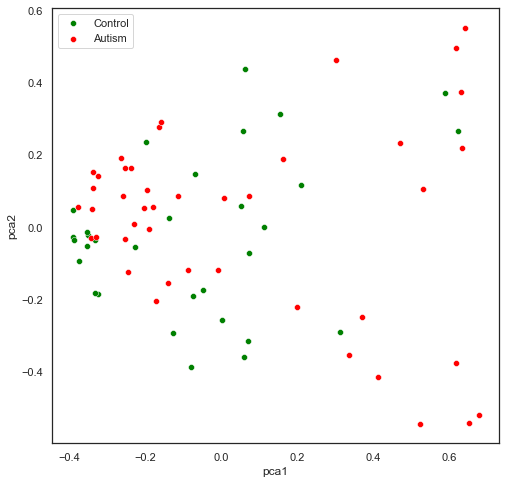

In [281]:
from sklearn.decomposition import PCA
pca = PCA(copy=True, n_components=3, whiten=False, random_state=1)
pca_res = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
table = pd.DataFrame({'pca1':pca_res[:,0], 'pca2':pca_res[:,1], 'label':labels})
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(style="whitegrid")
sns.scatterplot( x="pca1", y="pca2",data=table[table['label']=='C'], color='green',label='Control')
sns.scatterplot( x="pca1", y="pca2",data=table[table['label']=='ASD'], color='red',label='Autism')
sns.set_style('white')

plt.show()

/Users/guopeng/opt/anaconda3/envs/software/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/guopeng/opt/anaconda3/envs/software/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


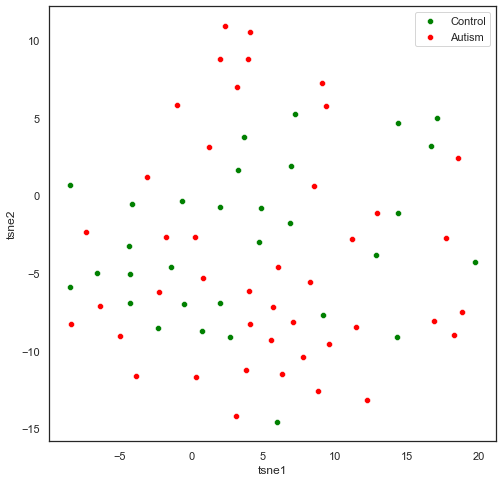

In [282]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
tsne_res = tsne.fit_transform(X)
table = pd.DataFrame({'tsne1':tsne_res[:,0], 'tsne2':tsne_res[:,1], 'label':labels})
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(style="whitegrid")
sns.scatterplot( x="tsne1", y="tsne2",data=table[table['label']=='C'], color='green',label='Control')
sns.scatterplot( x="tsne1", y="tsne2",data=table[table['label']=='ASD'], color='red',label='Autism')
sns.set_style('white')

plt.show()

In [283]:
ASD = [] 
for i in data_norm.index:
    if 'ASD' in i:
        ASD.append(1)
    else:
        ASD.append(0)
df2 = data_norm
df2['ASD'] = ASD

In [284]:
from sklearn.model_selection import train_test_split    #划分数据集为训练集和测试集
from sklearn.metrics import classification_report     #模型的预测报告
from sklearn.metrics import confusion_matrix    #模型的混淆矩阵
from sklearn.metrics import accuracy_score    #模型的分类正确率
from sklearn.model_selection import cross_val_score    #交叉验证

In [285]:
# 划分数据集
features = df2.iloc[:,:-1]
X = features.values
y = df2['ASD'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [286]:
# 使用随机森林
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,max_depth=20,max_features=10,random_state=20).fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('The acc of randomforset is %.5f'%(accuracy_score(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.73      1.00      0.85        11

    accuracy                           0.79        19
   macro avg       0.87      0.75      0.76        19
weighted avg       0.85      0.79      0.77        19

[[ 4  4]
 [ 0 11]]
The acc of randomforset is 0.78947


In [287]:
# 使用交叉验证
scores = cross_val_score(rf, X, y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.8        0.8        0.73333333 0.86666667 0.71428571]
0.7828571428571429


In [288]:
# 使用逻辑回归
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1',C=.6,random_state=8,max_iter=500,solver='liblinear').fit(X_train,y_train)
# penalty正则化参数str类型，c正则化强度愈小愈强，max_iter迭代次数，solver分类器liblinear（比较慢）分析小数据集
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('The acc of logistic regression is %.5f'%(accuracy_score(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.86      0.55      0.67        11

    accuracy                           0.68        19
   macro avg       0.72      0.71      0.68        19
weighted avg       0.74      0.68      0.68        19

[[7 1]
 [5 6]]
The acc of logistic regression is 0.68421


In [289]:
# 使用交叉验证
scores = cross_val_score(lr, X, y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.73333333 0.73333333 0.8        0.66666667 0.64285714]
0.7152380952380952


In [290]:
# 使用朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('The acc of naive_bayes is %.5f'%(accuracy_score(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.67      0.36      0.47        11

    accuracy                           0.53        19
   macro avg       0.56      0.56      0.52        19
weighted avg       0.58      0.53      0.51        19

[[6 2]
 [7 4]]
The acc of naive_bayes is 0.52632


In [291]:
# 使用交叉验证
scores = cross_val_score(clf, X, y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.66666667 0.4        0.46666667 0.53333333 0.64285714]
0.5419047619047619


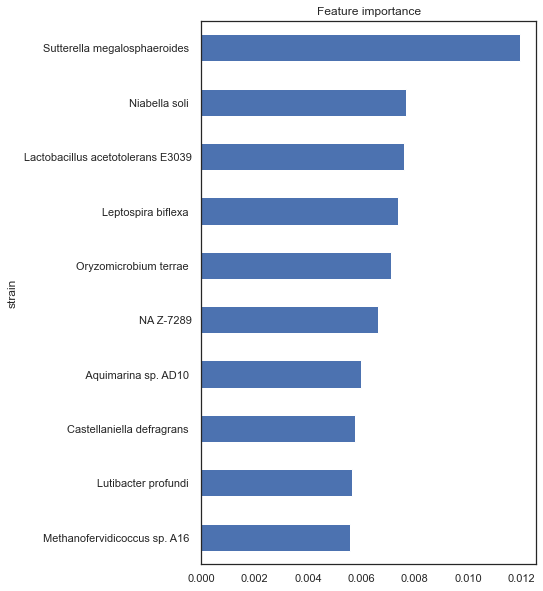

In [292]:
figure,ax = plt.subplots(figsize=(6,10))
index = df2.drop(['ASD'],axis=1).columns     #生成行索引

rf_importance = rf.feature_importances_
rf_feature_importance = pd.DataFrame(rf_importance.T,index=index,columns=['score']).sort_values(by='score',ascending=False).head(10)
rf_feature_importance = rf_feature_importance.sort_values(by='score', ascending = True)
#df.T行与列对调，index行索引，columns列索引,sort_values用于排序，by行/列排序，ascending=True升序排序
rf_feature_importance.plot(kind='barh',legend=False,ax=ax)
ax.set_title('Feature importance')
sns.set_style('white')
plt.show()

In [293]:
rf_feature_importance

,score
strain,
Methanofervidicoccus sp. A16,0.005577
Lutibacter profundi,0.005629
Castellaniella defragrans,0.005771
Aquimarina sp. AD10,0.005966
NA Z-7289,0.006622
Oryzomicrobium terrae,0.007100
Leptospira biflexa,0.007381
Lactobacillus acetotolerans E3039,0.007611
Niabella soli,0.007676
